# Adjusters

Here we plot different adjusters (also known as: lookback adjusters & capital/martingale calibrators) for illustration purposes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ecombine as ec

In [2]:
ec.set_theme()

In [3]:
def plot_adjusters(adjuster_fns: dict, max_exp=6):
    """Plot different adjuster functions on log-scale axis using seaborn."""
    e = np.logspace(0, max_exp, 1000)
    y = np.array([fn(e) for _, fn in adjuster_fns.items()])
    df = pd.DataFrame(y.T, columns=[name for name in adjuster_fns])
    df['e'] = e
    df = df.melt(id_vars='e', var_name='Adjuster', value_name='A(e)')
    fg = sns.relplot(
        x='e', 
        y='A(e)', 
        hue='Adjuster',
        style="Adjuster",
        kind='line',
        linewidth=2.5,
        alpha=0.8,
        aspect=1.25, 
        height=5,
        data=df, 
    )
    fg.set(
        xscale='log', 
        yscale='log',
        xlim=(1, 10 ** max_exp),
        ylim=(1e-1, 10 ** (max_exp - 2)),
    )
    return fg

In [4]:
adjuster_fns = {
    r"$A_{mix}$": ec.adjuster,
    # r"$A_{mix2}$": lambda e: (e - 1 - np.log(e + 1e-8)) / (np.log(e + 1e-8) ** 2),  # closed form
    r"$A_{KV}$": lambda e: ec.adjuster(e, use_kv=True),
    r"$A_{sqrt}$": lambda e: np.sqrt(e) - 1,
    # r"$A_{3/4}}$": lambda e: ec.adjuster(e, kappa=3/4),
    r"$A_{1/2}$": lambda e: ec.adjuster(e, kappa=1/2),
    r"$A_{1/4}$": lambda e: ec.adjuster(e, kappa=1/4),
    # r"$A_{1/8}$": lambda e: ec.adjuster(e, kappa=1/8),
}

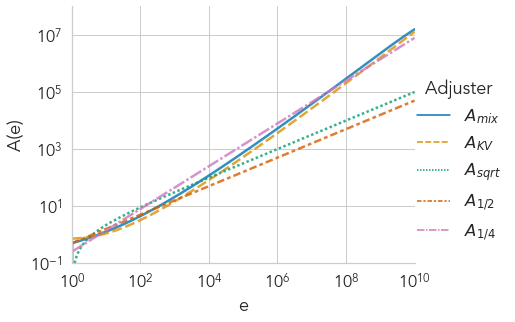

In [5]:
fg = plot_adjusters(adjuster_fns, max_exp=10)
fg.savefig("plots/adjusters.png", dpi=300)
fg.savefig("plots/adjusters.pdf", dpi=300)